In [30]:
# Template matching:
#     In template matching it's looking for
#     an exact copy of an image in another image

In [31]:
# Template matching:
#     => Template matching is the simplest form of object detection
#     => It simply scans a larger image for a provided template by 
#     sliding the template target image across the larger image.
#     => The main option that can be adjusted is the comparison methon
#     used as the target template is slid across the larger image.
#     => The methods are all some sort of correlation based metric.
    

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
full = cv2.imread('../../data/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

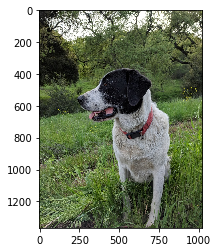

In [34]:
plt.imshow(full)


In [35]:
full.shape

(1367, 1025, 3)

In [36]:
face = cv2.imread('../../data/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

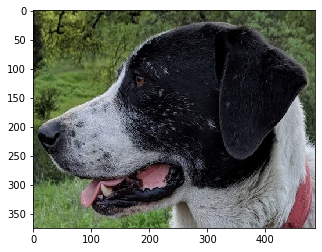

In [37]:
plt.imshow(face)

In [38]:
face.shape

(375, 486, 3)

In [39]:
sum([1,2,3])

6

In [40]:
mysrting = 'sum'

In [41]:
eval(mysrting)

<function sum(iterable, start=0, /)>

In [42]:
myfunc = eval(mysrting)

In [43]:
myfunc([1,2,3])

6

In [44]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to fuction
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

In [45]:
my_method = eval('cv2.TM_CCOEFF')
res1 = cv2.matchTemplate(full,face,my_method)

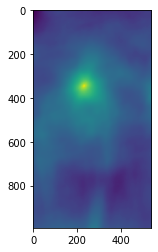

In [46]:
plt.imshow(res1)

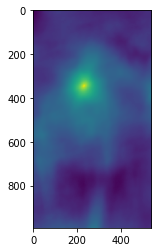

In [47]:
my_method = eval('cv2.TM_CCOEFF_NORMED')
res2 = cv2.matchTemplate(full,face,my_method)
plt.imshow(res2)

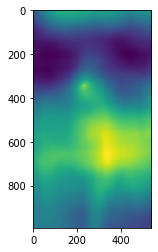

In [48]:
my_method = eval('cv2.TM_CCORR')
res2 = cv2.matchTemplate(full,face,my_method)
plt.imshow(res2)

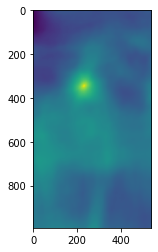

In [49]:
my_method = eval('cv2.TM_CCORR_NORMED')
res2 = cv2.matchTemplate(full,face,my_method)
plt.imshow(res2)

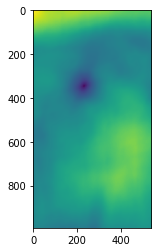

In [50]:
my_method = eval('cv2.TM_SQDIFF')
res2 = cv2.matchTemplate(full,face,my_method)
plt.imshow(res2)

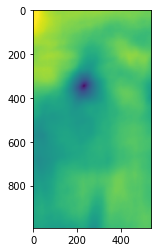

In [51]:
my_method = eval('cv2.TM_SQDIFF_NORMED')
res2 = cv2.matchTemplate(full,face,my_method)
plt.imshow(res2)

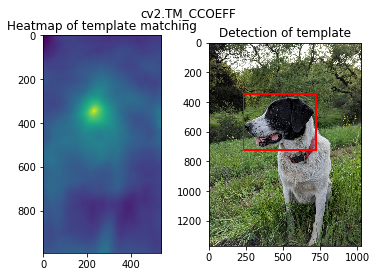

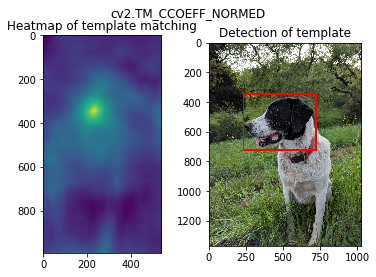

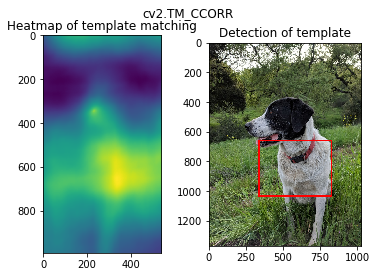

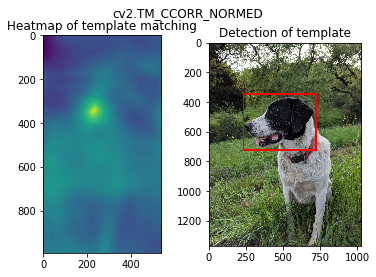

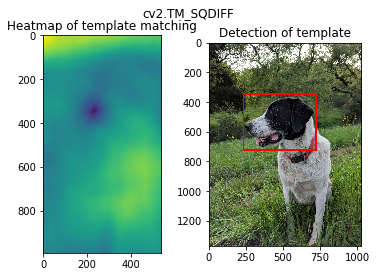

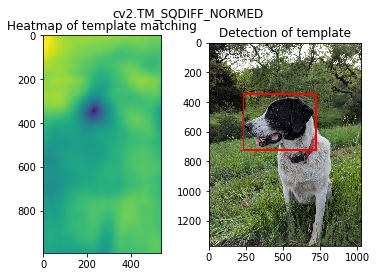

In [52]:
for m in methods:
    # create a copy
    full_copy = full.copy()
    
    method = eval(m)
    
    #Template matching
    result = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc= cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        topLeft = min_loc #(x,y)
    else:
        topLeft = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (topLeft[0]+width,topLeft[1]+height)
    
    cv2.rectangle(full_copy,topLeft,bottom_right,(255,0,0),10)
    
    # plot and show the image
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title("Heatmap of template matching")
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Detection of template")
    #title with the method
    plt.suptitle(m)
    
    
    plt.show()
    
    print('\t')
    print('\t')

In [53]:
face.shape

(375, 486, 3)